In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame,Series
import math

In [40]:
L = 0.4 #m
k =0.7 #W/m°C
cp = 700 #J/kg.°C
rho = 2000 #kg/m³
Ti = 20 #°C
T_infinito = 100 #°C
Bi = 0.8
A = 1 #m²
pi = math.pi

h = Bi *k/L
alpha = k/(rho*cp)


In [41]:
#função que retorna n valores de ksi
def f(ksi):
    y = ksi *tan(ksi) - Bi
    
    return y

        

"\naxis.scatter(0.791+pi,0,color ='red', marker='s')\naxis.scatter(0.791+pi-1,0,color ='red', marker='s')\n\naxis.scatter(3.37+pi,0,color ='red', marker='s')\naxis.scatter(3.37+pi-1,0,color ='red', marker='s')\n\naxis.scatter(6.4+pi,0,color ='red', marker='s')\naxis.scatter(6.4+pi-1,0,color ='red', marker='s')\n"

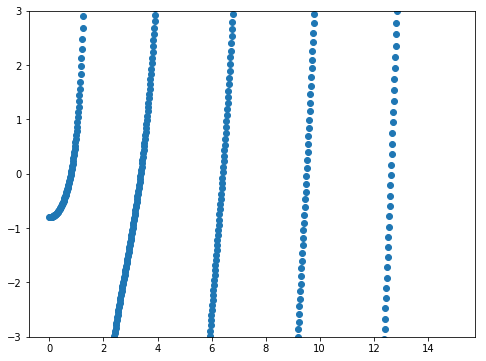

In [42]:
#visualização da função
%matplotlib inline
fig = plt.figure(figsize=(8,6))
axis = fig.add_subplot(111)    

x = np.linspace(0,15,1000)

f2 =np.vectorize(f)
#y= f(x)
axis.set_ylim(-3,3)
axis.scatter(x,f2(x))
'''
axis.scatter(0.791+pi,0,color ='red', marker='s')
axis.scatter(0.791+pi-1,0,color ='red', marker='s')

axis.scatter(3.37+pi,0,color ='red', marker='s')
axis.scatter(3.37+pi-1,0,color ='red', marker='s')

axis.scatter(6.4+pi,0,color ='red', marker='s')
axis.scatter(6.4+pi-1,0,color ='red', marker='s')
'''

In [43]:
#função que entra com n raízes desejadas e retorna o valor dessas raízes
def ksi(n):
    ksi_vector = []
    eps = 1e-7
    
    a = 0.6
    b = 0.8
    xm = (a+b)/2
    
    for i in range(n):
        while (abs(f(xm)) > eps):            
            if (f(a)*f(xm) > 0):
                a = xm
                        
            if (f(a)*f(xm) < 0):
                b = xm
                
            xm = (a+b)/2
            
            
        ksi_vector.append(xm)
        b = xm+pi
        a = xm+pi -1
        xm = (a+b)/2
    return ksi_vector

    

In [105]:
mesh = 9
deltax = L/(mesh-1)

time = 1000
deltat = 2000

In [106]:
#definição de delta t max

deltat_max = deltax**2/(2*alpha*(1+h*deltax/k))
deltat_max

2272.727272727273

In [122]:
#solução numérica

T = np.zeros((time,mesh))
q = np.zeros((time,mesh))
M = rho * A * deltax
x_plot = np.zeros(mesh)

for volume in range(mesh):
    T[0,volume] = 20
    if volume>0:
        x_plot[volume] = x_plot[volume-1] +deltax

for t in range(1,time):
    for volume in range(mesh):        
    
        if volume == 0:
            ae = k*A/(deltax)
            ap = M/2*cp/deltat
            
            T[t,volume] = (ae*T[t-1,volume+1] + (ap-ae)*T[t-1,volume])/ap
            
        if (volume > 0) and (volume < mesh-1):
            ae = k*A/deltax
            aw = ae
            ap = M*cp/deltat
            
            T[t,volume] = (aw*T[t-1,volume-1] + ae*T[t-1,volume+1] +(ap-ae-aw)*T[t-1,volume])/ap
            
        if (volume == mesh-1):
            aw =k*A/deltax
            ap = M/2*cp/deltat
            b = h*A*T_infinito
            
            T[t,volume] = (aw*T[t-1,volume-1] +(ap-aw-h*A)*T[t-1,volume] + b)/ap
        q[t,volume] = k*A/deltax*(T[t,volume]-T[t,volume-1])
            
        

In [109]:
#solução analítica
T_analitico = np.zeros((time,mesh))

#for volume in range(mesh):
    #T_analitico[0,volume] = 20

N = 100

ksi_n = ksi(N)

    
for t in range(time):
    for x in range(mesh):
        x_ad = x_plot[x]/L
        Fo = alpha*deltat*(t)/L**2
        soma =0
        
        #somatório
        for n in range(N):
            Cn = 4*sin(ksi_n[n])/(2*ksi_n[n] + sin(2*ksi_n[n]))
            soma = soma + Cn*exp(-(ksi_n[n]**2*Fo)) * cos(ksi_n[n]*x_ad)
            
        T_analitico[t,x] = soma*(Ti-T_infinito) +T_infinito
        

        
mesh_analitico = 100    
x_plot_analitico = np.zeros(mesh_analitico)
deltax_analitico = L/(mesh_analitico-1)
T_analitico_plot = np.zeros((time,mesh_analitico))

for volume in range(mesh_analitico):
    if volume>0:
        x_plot_analitico[volume] = x_plot_analitico[volume-1] +deltax_analitico
        

for t in range(time):
    for x in range(mesh_analitico):
        x_ad = x_plot_analitico[x]/L
        Fo = alpha*deltat*(t)/L**2
        soma =0
        
        #somatório
        for n in range(N):
            Cn = 4*sin(ksi_n[n])/(2*ksi_n[n] + sin(2*ksi_n[n]))
            soma = soma + Cn*exp(-(ksi_n[n]**2*Fo)) * cos(ksi_n[n]*x_ad)
            
        T_analitico_plot[t,x] = soma*(Ti-T_infinito) +T_infinito
        
        

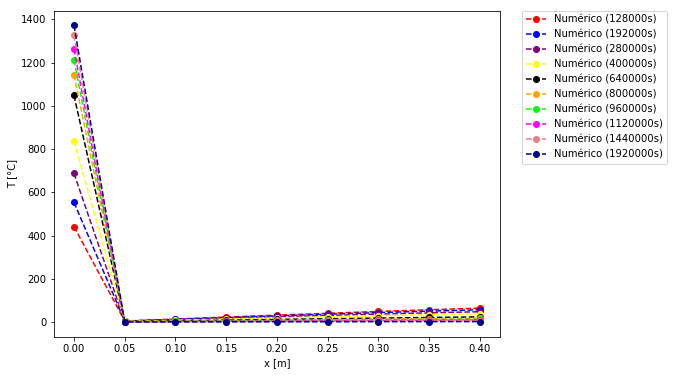

In [123]:
%matplotlib inline
fig = plt.figure(figsize=(8,6))
axis = fig.add_subplot(111)    

colors = [ 'green','red','blue','purple','yellow', 'black',  'orange', 'lime', 
          'magenta','lightcoral','darkblue', 'gray','darkorange','springgreen','blueviolet']
i=0
timelist = [16,24,35,50,80,100,120,140,180,240]
timelist_nova = [64,96,140,200,320,400,480,560,720,960]
#timelist = [0,1,2,3,4,5,6,7]
for t in timelist_nova:       
    #axis.plot(x_plot, T[t],label='Numérico ('+str(t*deltat)+'s)',ls='--',marker='o',color = colors[i])
    
    #axis.scatter(x_plot, T[t],label='Numérico ('+str(t*deltat)+'s)',marker='o',color = colors[i])
    #axis.plot(x_plot_analitico,T_analitico_plot[t],color = colors[i],label='Analítico ('+str(t*deltat)+'s)')
    i+=1
    axis.plot(x_plot, q[t],label='Numérico ('+str(t*deltat)+'s)',ls='--',marker='o',color = colors[i])
    


axis.set_ylabel('T [°C]')
axis.set_xlabel('x [m]')
axis.set_title('')
axis.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#axis.set_ylim(70,180)
#axis.set_xlim(0,90)


In [121]:
#tabelas com erros
tabela_Temp = DataFrame()

t=960
    
tabela_Temp['Posição [m]'] = x_plot.round(6)
tabela_Temp['Temp. analítica[°C]'] = T_analitico[t].round(6).tolist()   

tabela_Temp['Temp. numérica[°C]'] = T[t].round(6).tolist()
tabela_Temp['Diferença de Temp.[°C]'] = np.absolute(T[t]-T_analitico[t]).round(6).tolist()
    

tabela_Temp

,Posição [m],Temp. analítica[°C],Temp. numérica[°C],Diferença de Temp.[°C]
0,0.00,97.936548,97.953992,0.017444
1,0.05,97.946628,97.963999,0.017371
2,0.10,97.976766,97.993920,0.017154
3,0.15,98.026670,98.043464,0.016794
4,0.20,98.095852,98.112146,0.016294
5,0.25,98.183636,98.199294,0.015659
6,0.30,98.289163,98.304055,0.014892
7,0.35,98.411405,98.425406,0.014001
8,0.40,98.549165,98.562158,0.012993
